## 📌 ÉTAPE 1 : Installation et Configuration de R dans Colab

Google Colab utilise Python par défaut. Pour utiliser R, nous devons d'abord l'installer.

In [ ]:
%%shell
# Installation de R et des dépendances système
apt-get update -qq
apt-get install -y r-base r-base-dev
apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev libfontconfig1-dev libharfbuzz-dev libfribidi-dev
apt-get install -y libfreetype6-dev libpng-dev libtiff5-dev libjpeg-dev

echo "✅ R installé avec succès!"

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base-dev is already the newest version (4.5.2-1.2204.0).
r-base is already the newest version (4.5.2-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 121 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libfontconfig1-dev is already the newest version (2.13.1-4.2ubuntu5).
libfontconfig1-dev set to manually installed.
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.21).
The following additional packages will be installed:
  libgraphite2-dev libharfbuzz-gobject0 libharfbuzz-icu0 libssl3 libxml2
Suggested packages:
  libgraphite2-utils libssl-doc
The following NEW packages will be installed:
  libfribidi-dev libgraph

## 📌 ÉTAPE 2 : Activer le Runtime R

Chargement de l'extension rpy2 pour utiliser R dans les cellules.

In [ ]:
# Installation de rpy2 pour l'intégration R-Python
%pip install rpy2 -q

# Charger l'extension R magic
%load_ext rpy2.ipython

print("✅ Extension R activée!")

✅ Extension R activée!


## 📌 ÉTAPE 3 : Installation des Packages R Nécessaires

⚠️ **IMPORTANT:** Cette cellule peut prendre 5-10 minutes. Soyez patient!

In [ ]:
%%R

# Configuration des miroirs CRAN
options(repos = c(CRAN = "https://cloud.r-project.org"))

# Liste des packages nécessaires
packages <- c(
  "tidyverse",
  "caret",
  "randomForest",
  "e1071",
  "ggplot2",
  "corrplot",
  "pROC",
  "MASS",
  "class"
)

cat("📦 Installation des packages R...\n\n")

# Installer chaque package
for (pkg in packages) {
  if (!require(pkg, character.only = TRUE, quietly = TRUE)) {
    cat(paste("Installation de", pkg, "...\n"))
    install.packages(pkg, dependencies = TRUE, quiet = TRUE)
  } else {
    cat(paste("✓", pkg, "déjà installé\n"))
  }
}

cat("\n✅ Tous les packages sont installés!\n")

📦 Installation des packages R...

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
✓ tidyverse déjà installé
Installation de caret ...
✓ randomForest déjà installé
✓ e1071 déjà installé
✓ ggplot2 déjà installé
Installation de corrplot ...
✓ pROC déjà installé
✓ MASS déjà installé
✓ class déjà installé

✅ Tous les packages sont installés!


also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘rbibutils’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘sparsevctrs’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, ‘mda’, ‘mlbench’, ‘MLmetrics’, ‘pamr’, ‘party’, ‘pls’, ‘proxy’, ‘randomForest’, ‘RANN’, ‘spls’, ‘superpc’, ‘themis’

randomForest 4.7-1.2
Type rf

## 📌 ÉTAPE 4 : Téléchargement du Dataset depuis Google Drive

**VOTRE LIEN GOOGLE DRIVE:**  
`https://drive.google.com/file/d/1KQj1Hy15qsdExLvVlV0dGMG6RssOA5zL/view?usp=drive_link`

In [ ]:
# Installation de gdown pour télécharger depuis Google Drive
%pip install gdown -q

import gdown

file_id = "1KQj1Hy15qsdExLvVlV0dGMG6RssOA5zL"
url = f"https://drive.google.com/uc?id={file_id}"
output = "manufacturing_defects_dataset.csv"

gdown.download(url, output, quiet=False)

print(f"\n✅ Fichier téléchargé: {output}")

import os
if os.path.exists(output):
    print(f"✅ Fichier trouvé! Taille: {os.path.getsize(output)} bytes")
else:
    print("❌ ERREUR: Fichier non trouvé!")

Downloading...
From: https://drive.google.com/uc?id=1KQj1Hy15qsdExLvVlV0dGMG6RssOA5zL
To: /content/manufacturing_defects_dataset.csv
100%|██████████| 760k/760k [00:00<00:00, 121MB/s]


✅ Fichier téléchargé: manufacturing_defects_dataset.csv
✅ Fichier trouvé! Taille: 760500 bytes


## 📌 ÉTAPE 5 : Chargement et Exploration des Données

In [ ]:
%%R

# Chargement des bibliothèques
library(tidyverse)
library(caret)

# Définir le seed pour la reproductibilité
set.seed(123)

# Charger les données
cat("📊 Chargement des données...\n\n")
data <- read.csv("manufacturing_defects_dataset.csv", stringsAsFactors = FALSE)

# Afficher la structure
cat("=== STRUCTURE DES DONNÉES ===\n")
str(data)

cat("\n=== DIMENSIONS ===\n")
cat("Nombre de lignes:", nrow(data), "\n")
cat("Nombre de colonnes:", ncol(data), "\n")

cat("\n=== PREMIÈRES LIGNES ===\n")
head(data)

cat("\n=== RÉSUMÉ STATISTIQUE ===\n")
summary(data)

📊 Chargement des données...

=== STRUCTURE DES DONNÉES ===
'data.frame':	3240 obs. of  17 variables:
 $ ProductionVolume    : int  202 535 960 370 206 171 800 120 714 221 ...
 $ ProductionCost      : num  13175 19770 19061 5648 7472 ...
 $ SupplierQuality     : num  86.6 86.3 82.1 87.3 82 ...
 $ DeliveryDelay       : int  1 4 0 5 3 1 3 4 5 2 ...
 $ DefectRate          : num  3.121 0.82 4.515 0.639 3.868 ...
 $ QualityScore        : num  63.5 83.7 90.4 67.6 82.7 ...
 $ MaintenanceHours    : int  9 20 1 8 9 19 10 13 2 0 ...
 $ DowntimePercentage  : num  0.0523 4.9083 2.4649 4.6925 2.7467 ...
 $ InventoryTurnover   : num  8.63 9.3 5.1 3.58 6.85 ...
 $ StockoutRate        : num  0.08132 0.03849 0.00289 0.05533 0.06805 ...
 $ WorkerProductivity  : num  85 99.7 92.8 96.9 88.3 ...
 $ SafetyIncidents     : int  0 7 2 8 7 7 8 3 4 6 ...
 $ EnergyConsumption   : num  2420 3916 3392 4652 1582 ...
 $ EnergyEfficiency    : num  0.469 0.119 0.496 0.183 0.264 ...
 $ AdditiveProcessTime : num  5.55 9.0

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



## 📌 ÉTAPE 6 : Prétraitement des Données

In [ ]:
%%R

cat("🔧 Prétraitement des données...\n\n")

# Détection automatique de la variable cible
if("DefectStatus" %in% names(data)) {
  target_var <- "DefectStatus"
} else if("Defect" %in% names(data)) {
  target_var <- "Defect"
} else if("Target" %in% names(data)) {
  target_var <- "Target"
} else {
  # Chercher une variable binaire
  binary_vars <- sapply(data, function(x) length(unique(x)) == 2)
  if(any(binary_vars)) {
    target_var <- names(data)[binary_vars][1]
  } else {
    stop("❌ Impossible de détecter la variable cible!")
  }
}

cat("🎯 Variable cible détectée:", target_var, "\n")
cat("Valeurs uniques avant transformation:", unique(data[[target_var]]), "\n\n")

# CORRECTION IMPORTANTE : Renommer les niveaux du facteur
# Convertir en facteur avec des noms valides
data[[target_var]] <- factor(data[[target_var]],
                              levels = c(0, 1),
                              labels = c("NoDefect", "Defect"))

cat("✅ Variable cible transformée en facteur\n")
cat("Nouveaux niveaux:", levels(data[[target_var]]), "\n\n")

# Vérifier la distribution
cat("📊 Distribution de", target_var, ":\n")
print(table(data[[target_var]]))
cat("\n")

# Supprimer les colonnes non pertinentes
cols_to_remove <- c("ProductID", "ID", "id", "Index", "index")
data <- data[, !(names(data) %in% cols_to_remove), drop = FALSE]

# Gérer les valeurs manquantes
if(any(is.na(data))) {
  cat("⚠️ Valeurs manquantes détectées. Suppression des lignes incomplètes...\n")
  data <- na.omit(data)
  cat("✅ Lignes avec valeurs manquantes supprimées.\n\n")
}

# Résumé final
cat("📋 Dataset final:\n")
cat("  • Dimensions:", nrow(data), "lignes ×", ncol(data), "colonnes\n")
cat("  • Variable cible:", target_var, "\n")
cat("  • Variables prédictives:", ncol(data) - 1, "\n")
cat("  • Classes: ", paste(levels(data[[target_var]]), collapse = ", "), "\n\n")

cat("✅ Prétraitement terminé!\n")

🔧 Prétraitement des données...

🎯 Variable cible détectée: DefectStatus 
Valeurs uniques avant transformation: 1 0 

✅ Variable cible transformée en facteur
Nouveaux niveaux: NoDefect Defect 

📊 Distribution de DefectStatus :

NoDefect   Defect 
     517     2723 

📋 Dataset final:
  • Dimensions: 3240 lignes × 17 colonnes
  • Variable cible: DefectStatus 
  • Variables prédictives: 16 
  • Classes:  NoDefect, Defect 

✅ Prétraitement terminé!


## 📌 ÉTAPE 7 : Analyse Descriptive et Visualisations

📈 Génération des visualisations...


📊 Matrice de corrélation:
Nombre de variables numériques: 16


🔍 CORRÉLATIONS FORTES (|r| > 0.7):
  Aucune corrélation forte détectée.

✅ Visualisations générées avec succès!


corrplot 0.95 loaded
In addition: Warning message:
<ggplot> %+% x was deprecated in ggplot2 4.0.0.
ℹ Please use <ggplot> + x instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 


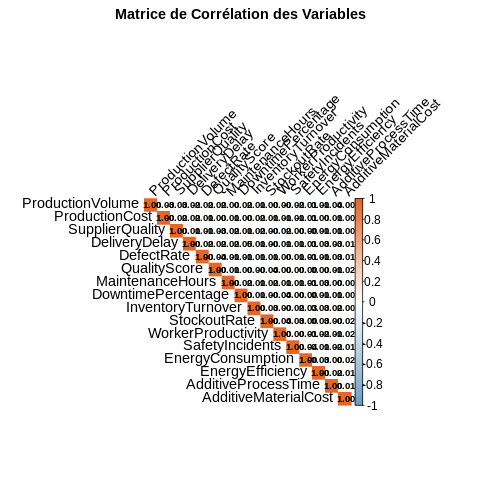

In [ ]:
%%R

library(ggplot2)
library(corrplot)

cat("📈 Génération des visualisations...\n\n")

# 1. Distribution de la variable cible
p1 <- ggplot(data, aes(x = .data[[target_var]], fill = .data[[target_var]])) +
  geom_bar() +
  geom_text(stat = 'count', aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Distribution de la Variable Cible",
       x = target_var,
       y = "Fréquence") +
  theme_minimal() +
  theme(legend.position = "none")

print(p1)

# 2. Matrice de corrélation AMÉLIORÉE
numeric_cols <- sapply(data, is.numeric)
numeric_vars <- data[, numeric_cols, drop = FALSE]

if(ncol(numeric_vars) > 1) {
  cat("\n📊 Matrice de corrélation:\n")
  cat(sprintf("Nombre de variables numériques: %d\n\n", ncol(numeric_vars)))

  cor_matrix <- cor(numeric_vars, use = "complete.obs")

  # Configurer la taille du graphique pour meilleure lisibilité
  options(repr.plot.width = 14, repr.plot.height = 14)

  # Créer une matrice de corrélation plus lisible
  corrplot(cor_matrix,
           method = "color",           # Utiliser des couleurs
           type = "upper",             # Afficher seulement le triangle supérieur
           tl.col = "black",           # Couleur des étiquettes
           tl.srt = 45,                # Rotation des étiquettes à 45°
           tl.cex = 1.2,               # Taille des étiquettes (augmentée)
           addCoef.col = "black",      # Afficher les coefficients en noir
           number.cex = 0.8,           # Taille des coefficients (augmentée)
           number.digits = 2,          # 2 décimales
           col = colorRampPalette(c("#6D9EC1", "white", "#E46726"))(200),  # Palette de couleurs
           title = "Matrice de Corrélation des Variables",
           mar = c(0, 0, 2, 0),        # Marges
           cl.cex = 1.0)               # Taille de la légende des couleurs

  # Identifier les corrélations fortes
  cat("\n🔍 CORRÉLATIONS FORTES (|r| > 0.7):\n")
  cat("=" %+% paste(rep("=", 60), collapse="") %+% "\n")

  # Trouver les paires avec forte corrélation
  cor_matrix[lower.tri(cor_matrix, diag = TRUE)] <- NA
  high_cor <- which(abs(cor_matrix) > 0.7, arr.ind = TRUE)

  if(nrow(high_cor) > 0) {
    for(i in 1:nrow(high_cor)) {
      var1 <- rownames(cor_matrix)[high_cor[i, 1]]
      var2 <- colnames(cor_matrix)[high_cor[i, 2]]
      cor_val <- cor_matrix[high_cor[i, 1], high_cor[i, 2]]
      cat(sprintf("  • %s ↔ %s: %.3f\n", var1, var2, cor_val))
    }
  } else {
    cat("  Aucune corrélation forte détectée.\n")
  }

} else {
  cat("\n⚠️ Pas assez de variables numériques pour une matrice de corrélation.\n")
}

cat("\n✅ Visualisations générées avec succès!\n")

## 📌 ÉTAPE 8 : Division des Données (Train/Test)

In [ ]:
%%R

cat("✂️ Division des données en ensemble d'entraînement et de test...\n\n")

# Division 70% entraînement, 30% test (stratifiée)
trainIndex <- createDataPartition(data[[target_var]], p = 0.7, list = FALSE)
train_data <- data[trainIndex, ]
test_data <- data[-trainIndex, ]

cat("=== DIVISION DES DONNÉES ===\n")
cat("Ensemble d'entraînement:", nrow(train_data), "observations\n")
cat("Ensemble de test:", nrow(test_data), "observations\n\n")

cat("Distribution dans l'ensemble d'entraînement:\n")
print(table(train_data[[target_var]]))
cat("\nDistribution dans l'ensemble de test:\n")
print(table(test_data[[target_var]]))

cat("\n✅ Division terminée!\n")

✂️ Division des données en ensemble d'entraînement et de test...

=== DIVISION DES DONNÉES ===
Ensemble d'entraînement: 2269 observations
Ensemble de test: 971 observations

Distribution dans l'ensemble d'entraînement:

NoDefect   Defect 
     362     1907 

Distribution dans l'ensemble de test:

NoDefect   Defect 
     155      816 

✅ Division terminée!


## 📌 ÉTAPE 9 : Configuration de la Validation Croisée

In [ ]:
%%R

cat("\n" , rep("=", 70), "\n")
cat("🔀 DIVISION DES DONNÉES\n")
cat(rep("=", 70), "\n\n")

library(caret)

# Définir le seed pour la reproductibilité
set.seed(123)

# Division 70% train / 30% test
train_index <- createDataPartition(data[[target_var]], p = 0.7, list = FALSE)
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

cat("📊 Division effectuée:\n")
cat("  • Données d'entraînement:", nrow(train_data), "lignes\n")
cat("  • Données de test:", nrow(test_data), "lignes\n\n")

# Vérifier la distribution dans chaque ensemble
cat("Distribution dans l'ensemble d'entraînement:\n")
print(table(train_data[[target_var]]))
cat("\nDistribution dans l'ensemble de test:\n")
print(table(test_data[[target_var]]))

cat("\n" , rep("=", 70), "\n")
cat("⚙️ CONFIGURATION DE LA VALIDATION CROISÉE\n")
cat(rep("=", 70), "\n\n")

# Configuration de la validation croisée
train_control <- trainControl(
  method = "cv",              # Validation croisée
  number = 10,                # 10 plis
  classProbs = TRUE,          # Calculer les probabilités de classe
  summaryFunction = twoClassSummary,  # Fonction pour classification binaire
  savePredictions = "final",  # Sauvegarder les prédictions finales
  verboseIter = FALSE         # Pas d'affichage verbeux
)

# Créer la formule du modèle
predictor_vars <- setdiff(names(train_data), target_var)
formula_model <- as.formula(paste(target_var, "~", paste(predictor_vars, collapse = " + ")))

cat("📝 Formule du modèle:\n")
print(formula_model)
cat("\n")

cat("✅ Configuration terminée!\n")
cat("   Prêt pour l'entraînement des modèles.\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🔀 DIVISION DES DONNÉES
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

📊 Division effectuée:
  • Données d'entraînement: 2269 lignes
  • Données de test: 971 lignes

Distribution dans l'ensemble d'entraînement:

NoDefect   Defect 
     362     1907 

Distribution dans l'ensemble de test:

NoDefect   Defect 
     155      816 

 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
⚙️ CONFIGURATION DE LA VALIDATION CROISÉE
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

📝 Formule du modèle:
DefectStatus ~ ProductionVolume + ProductionCost + SupplierQuality + 
    DeliveryDelay

## 📌 ÉTAPE 10 : MODÈLE 1 - Régression Logistique

In [ ]:
%%R

cat("\n" , rep("=", 70), "\n")
cat("🔵 MODÈLE 1 : RÉGRESSION LOGISTIQUE\n")
cat(rep("=", 70), "\n\n")

# Entraînement
cat("⏳ Entraînement en cours...\n")
model_logistic <- train(
  formula_model,
  data = train_data,
  method = "glm",
  family = "binomial",
  trControl = train_control,
  metric = "ROC"
)

cat("\n✅ Entraînement terminé!\n\n")

# Prédictions
pred_logistic <- predict(model_logistic, test_data)
prob_logistic <- predict(model_logistic, test_data, type = "prob")

# Évaluation
conf_matrix_logistic <- confusionMatrix(pred_logistic,
                                        test_data[[target_var]],
                                        positive = "Defect")  # Spécifier la classe positive
print(conf_matrix_logistic)

cat("\n📊 Performance:\n")
cat("Accuracy:    ", round(conf_matrix_logistic$overall["Accuracy"], 4), "\n")
cat("Sensibilité: ", round(conf_matrix_logistic$byClass["Sensitivity"], 4), "\n")
cat("Spécificité: ", round(conf_matrix_logistic$byClass["Specificity"], 4), "\n")
cat("Kappa:       ", round(conf_matrix_logistic$overall["Kappa"], 4), "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🔵 MODÈLE 1 : RÉGRESSION LOGISTIQUE
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

⏳ Entraînement en cours...

✅ Entraînement terminé!

Confusion Matrix and Statistics

          Reference
Prediction NoDefect Defect
  NoDefect       55     24
  Defect        100    792
                                          
               Accuracy : 0.8723          
                 95% CI : (0.8497, 0.8927)
    No Information Rate : 0.8404          
    P-Value [Acc > NIR] : 0.003072        
                                          
                  Kappa : 0.4061          
                                          
 Mcnemar's Test P-Value : 1.637e-11       
                                          
            Sensitivity : 0.9706          
            Specific

## 📌 ÉTAPE 11 : MODÈLE 2 - Analyse Discriminante Linéaire (LDA)

In [ ]:
%%R

library(MASS)

cat("\n", rep("=", 70), "\n")
cat("🟢 MODÈLE 2 : ANALYSE DISCRIMINANTE LINÉAIRE (LDA)\n")
cat(rep("=", 70), "\n\n")

# Entraînement
cat("⏳ Entraînement en cours...\n")
model_lda <- train(
  formula_model,
  data = train_data,
  method = "lda",
  trControl = train_control,
  metric = "ROC"
)

cat("\n✅ Entraînement terminé!\n\n")

# Prédictions
pred_lda <- predict(model_lda, test_data)
prob_lda <- predict(model_lda, test_data, type = "prob")

# Évaluation
conf_matrix_lda <- confusionMatrix(pred_lda, test_data[[target_var]])
print(conf_matrix_lda)

cat("\n📊 Performance:\n")
cat("Accuracy:", round(conf_matrix_lda$overall["Accuracy"], 4), "\n")
cat("Sensibilité:", round(conf_matrix_lda$byClass["Sensitivity"], 4), "\n")
cat("Spécificité:", round(conf_matrix_lda$byClass["Specificity"], 4), "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🟢 MODÈLE 2 : ANALYSE DISCRIMINANTE LINÉAIRE (LDA)
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

⏳ Entraînement en cours...

✅ Entraînement terminé!

Confusion Matrix and Statistics

          Reference
Prediction NoDefect Defect
  NoDefect       50     19
  Defect        105    797
                                          
               Accuracy : 0.8723          
                 95% CI : (0.8497, 0.8927)
    No Information Rate : 0.8404          
    P-Value [Acc > NIR] : 0.003072        
                                          
                  Kappa : 0.3861          
                                          
 Mcnemar's Test P-Value : 2.29e-14        
                                          
            Sensitivity : 0.32258         
     

## 📌 ÉTAPE 12 : MODÈLE 3 - k-Nearest Neighbors (k-NN)

In [ ]:
%%R

library(class)

cat("\n", rep("=", 70), "\n")
cat("🔴 MODÈLE 3 : k-NEAREST NEIGHBORS (k-NN)\n")
cat(rep("=", 70), "\n\n")

# Standardisation des données pour k-NN
cat("📏 Standardisation des données...\n")
preProcess_model <- preProcess(train_data, method = c("center", "scale"))
train_scaled <- predict(preProcess_model, train_data)
test_scaled <- predict(preProcess_model, test_data)

# Entraînement avec optimisation de k
cat("⏳ Entraînement en cours (optimisation de k)...\n")
model_knn <- train(
  formula_model,
  data = train_scaled,
  method = "knn",
  trControl = train_control,
  tuneGrid = data.frame(k = seq(3, 21, by = 2)),
  metric = "ROC"
)

cat("\n✅ Entraînement terminé!\n")
cat("Meilleur k:", model_knn$bestTune$k, "\n\n")

# Prédictions
pred_knn <- predict(model_knn, test_scaled)
prob_knn <- predict(model_knn, test_scaled, type = "prob")

# Évaluation
conf_matrix_knn <- confusionMatrix(pred_knn, test_data[[target_var]])
print(conf_matrix_knn)

cat("\n📊 Performance:\n")
cat("Accuracy:", round(conf_matrix_knn$overall["Accuracy"], 4), "\n")
cat("Sensibilité:", round(conf_matrix_knn$byClass["Sensitivity"], 4), "\n")
cat("Spécificité:", round(conf_matrix_knn$byClass["Specificity"], 4), "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🔴 MODÈLE 3 : k-NEAREST NEIGHBORS (k-NN)
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

📏 Standardisation des données...
⏳ Entraînement en cours (optimisation de k)...

✅ Entraînement terminé!
Meilleur k: 21 

Confusion Matrix and Statistics

          Reference
Prediction NoDefect Defect
  NoDefect       20      5
  Defect        135    811
                                          
               Accuracy : 0.8558          
                 95% CI : (0.8321, 0.8773)
    No Information Rate : 0.8404          
    P-Value [Acc > NIR] : 0.1008          
                                          
                  Kappa : 0.1861          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                

## 📌 ÉTAPE 13 : MODÈLE 4 - Support Vector Machine (SVM)

In [ ]:
%%R

library(e1071)

cat("\n", rep("=", 70), "\n")
cat("🟣 MODÈLE 4 : SUPPORT VECTOR MACHINE (SVM)\n")
cat(rep("=", 70), "\n\n")

# Entraînement avec noyau RBF
cat("⏳ Entraînement en cours (noyau RBF)...\n")
model_svm <- train(
  formula_model,
  data = train_scaled,
  method = "svmRadial",
  trControl = train_control,
  tuneLength = 5,
  metric = "ROC"
)

cat("\n✅ Entraînement terminé!\n")
cat("Meilleurs paramètres:\n")
print(model_svm$bestTune)
cat("\n")

# Prédictions
pred_svm <- predict(model_svm, test_scaled)
prob_svm <- predict(model_svm, test_scaled, type = "prob")

# Évaluation
conf_matrix_svm <- confusionMatrix(pred_svm, test_data[[target_var]])
print(conf_matrix_svm)

cat("\n📊 Performance:\n")
cat("Accuracy:", round(conf_matrix_svm$overall["Accuracy"], 4), "\n")
cat("Sensibilité:", round(conf_matrix_svm$byClass["Sensitivity"], 4), "\n")
cat("Spécificité:", round(conf_matrix_svm$byClass["Specificity"], 4), "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🟣 MODÈLE 4 : SUPPORT VECTOR MACHINE (SVM)
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

⏳ Entraînement en cours (noyau RBF)...

✅ Entraînement terminé!
Meilleurs paramètres:
       sigma C
4 0.03578831 2

Confusion Matrix and Statistics

          Reference
Prediction NoDefect Defect
  NoDefect       78     31
  Defect         77    785
                                          
               Accuracy : 0.8888          
                 95% CI : (0.8673, 0.9079)
    No Information Rate : 0.8404          
    P-Value [Acc > NIR] : 1.042e-05       
                                          
                  Kappa : 0.5288          
                                          
 Mcnemar's Test P-Value : 1.490e-05       
                                   

## 📌 ÉTAPE 14 : MODÈLE 5 - Random Forest


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🟠 MODÈLE 5 : RANDOM FOREST
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

⏳ Entraînement en cours (500 arbres)...

✅ Entraînement terminé!
Meilleur mtry: 4 

Confusion Matrix and Statistics

          Reference
Prediction NoDefect Defect
  NoDefect      122      6
  Defect         33    810
                                          
               Accuracy : 0.9598          
                 95% CI : (0.9455, 0.9713)
    No Information Rate : 0.8404          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8389          
                                          
 Mcnemar's Test P-Value : 3.136e-05       
                                          
            Sensitivity : 0.7871        

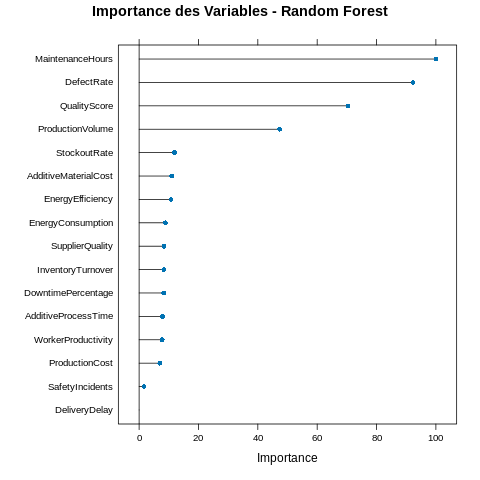

In [ ]:
%%R

library(randomForest)

cat("\n", rep("=", 70), "\n")
cat("🟠 MODÈLE 5 : RANDOM FOREST\n")
cat(rep("=", 70), "\n\n")

# Entraînement
cat("⏳ Entraînement en cours (500 arbres)...\n")
model_rf <- train(
  formula_model,
  data = train_data,
  method = "rf",
  trControl = train_control,
  tuneGrid = data.frame(mtry = seq(2, floor(sqrt(ncol(train_data)-1)), by = 1)),
  metric = "ROC",
  ntree = 500
)

cat("\n✅ Entraînement terminé!\n")
cat("Meilleur mtry:", model_rf$bestTune$mtry, "\n\n")

# Prédictions
pred_rf <- predict(model_rf, test_data)
prob_rf <- predict(model_rf, test_data, type = "prob")

# Évaluation
conf_matrix_rf <- confusionMatrix(pred_rf, test_data[[target_var]])
print(conf_matrix_rf)

cat("\n📊 Performance:\n")
cat("Accuracy:", round(conf_matrix_rf$overall["Accuracy"], 4), "\n")
cat("Sensibilité:", round(conf_matrix_rf$byClass["Sensitivity"], 4), "\n")
cat("Spécificité:", round(conf_matrix_rf$byClass["Specificity"], 4), "\n")

# Importance des variables
cat("\n📊 Importance des Variables:\n")
importance_rf <- varImp(model_rf)
print(importance_rf)
plot(importance_rf, main = "Importance des Variables - Random Forest")

## 📌 ÉTAPE 15 : Comparaison des Modèles

In [ ]:
%%R

cat("\n", rep("=", 70), "\n")
cat("📊 COMPARAISON DES PERFORMANCES\n")
cat(rep("=", 70), "\n\n")

# Créer un tableau comparatif
results_comparison <- data.frame(
  Modele = c("Régression Logistique", "LDA", "k-NN", "SVM", "Random Forest"),
  Accuracy = c(
    conf_matrix_logistic$overall["Accuracy"],
    conf_matrix_lda$overall["Accuracy"],
    conf_matrix_knn$overall["Accuracy"],
    conf_matrix_svm$overall["Accuracy"],
    conf_matrix_rf$overall["Accuracy"]
  ),
  Sensitivity = c(
    conf_matrix_logistic$byClass["Sensitivity"],
    conf_matrix_lda$byClass["Sensitivity"],
    conf_matrix_knn$byClass["Sensitivity"],
    conf_matrix_svm$byClass["Sensitivity"],
    conf_matrix_rf$byClass["Sensitivity"]
  ),
  Specificity = c(
    conf_matrix_logistic$byClass["Specificity"],
    conf_matrix_lda$byClass["Specificity"],
    conf_matrix_knn$byClass["Specificity"],
    conf_matrix_svm$byClass["Specificity"],
    conf_matrix_rf$byClass["Specificity"]
  ),
  Kappa = c(
    conf_matrix_logistic$overall["Kappa"],
    conf_matrix_lda$overall["Kappa"],
    conf_matrix_knn$overall["Kappa"],
    conf_matrix_svm$overall["Kappa"],
    conf_matrix_rf$overall["Kappa"]
  )
)

# Arrondir les valeurs
results_comparison[, 2:5] <- round(results_comparison[, 2:5], 4)

print(results_comparison)

# Identifier le meilleur modèle
best_model_idx <- which.max(results_comparison$Accuracy)
cat("\n🏆 MEILLEUR MODÈLE (basé sur Accuracy):", results_comparison$Modele[best_model_idx], "\n")
cat("   Accuracy:", results_comparison$Accuracy[best_model_idx], "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
📊 COMPARAISON DES PERFORMANCES
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

                 Modele Accuracy Sensitivity Specificity  Kappa
1 Régression Logistique   0.8723      0.9706      0.3548 0.4061
2                   LDA   0.8723      0.3226      0.9767 0.3861
3                  k-NN   0.8558      0.1290      0.9939 0.1861
4                   SVM   0.8888      0.5032      0.9620 0.5288
5         Random Forest   0.9598      0.7871      0.9926 0.8389

🏆 MEILLEUR MODÈLE (basé sur Accuracy): Random Forest 
   Accuracy: 0.9598 


## 📌 ÉTAPE 16 : Courbes ROC

📈 Génération des courbes ROC...

=== AUC (Area Under Curve) ===
Régression Logistique: 0.8387 
LDA: 0.8374 
k-NN: 0.8316 
SVM: 0.8611 
Random Forest: 0.8765 



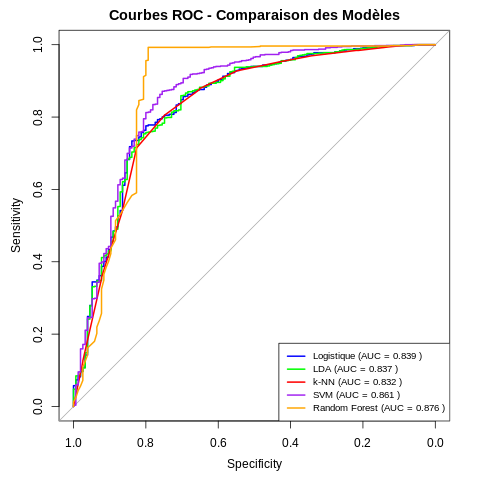

In [ ]:
%%R

library(pROC)

cat("📈 Génération des courbes ROC...\n\n")

# Créer les objets ROC
roc_logistic <- roc(test_data[[target_var]], prob_logistic[, 2], quiet = TRUE)
roc_lda <- roc(test_data[[target_var]], prob_lda[, 2], quiet = TRUE)
roc_knn <- roc(test_data[[target_var]], prob_knn[, 2], quiet = TRUE)
roc_svm <- roc(test_data[[target_var]], prob_svm[, 2], quiet = TRUE)
roc_rf <- roc(test_data[[target_var]], prob_rf[, 2], quiet = TRUE)

# Afficher les AUC
cat("=== AUC (Area Under Curve) ===\n")
cat("Régression Logistique:", round(auc(roc_logistic), 4), "\n")
cat("LDA:", round(auc(roc_lda), 4), "\n")
cat("k-NN:", round(auc(roc_knn), 4), "\n")
cat("SVM:", round(auc(roc_svm), 4), "\n")
cat("Random Forest:", round(auc(roc_rf), 4), "\n\n")

# Tracer les courbes ROC
plot(roc_logistic, col = "blue", lwd = 2, main = "Courbes ROC - Comparaison des Modèles")
plot(roc_lda, col = "green", lwd = 2, add = TRUE)
plot(roc_knn, col = "red", lwd = 2, add = TRUE)
plot(roc_svm, col = "purple", lwd = 2, add = TRUE)
plot(roc_rf, col = "orange", lwd = 2, add = TRUE)

legend("bottomright",
       legend = c(
         paste("Logistique (AUC =", round(auc(roc_logistic), 3), ")"),
         paste("LDA (AUC =", round(auc(roc_lda), 3), ")"),
         paste("k-NN (AUC =", round(auc(roc_knn), 3), ")"),
         paste("SVM (AUC =", round(auc(roc_svm), 3), ")"),
         paste("Random Forest (AUC =", round(auc(roc_rf), 3), ")")
       ),
       col = c("blue", "green", "red", "purple", "orange"),
       lwd = 2,
       cex = 0.8)

## 📌 ÉTAPE 17 : Exemple de Prédiction sur de Nouvelles Données

In [ ]:
%%R

cat("\n", rep("=", 70), "\n")
cat("🔮 EXEMPLE DE PRÉDICTION\n")
cat(rep("=", 70), "\n\n")

# Prendre quelques exemples de l'ensemble de test
nouveaux_produits <- test_data[1:5, ]

cat("Nouveaux produits à classifier:\n")
print(nouveaux_produits)

# Prédiction avec le meilleur modèle (Random Forest)
predictions <- predict(model_rf, nouveaux_produits)
probabilities <- predict(model_rf, nouveaux_produits, type = "prob")

cat("\n=== RÉSULTATS DES PRÉDICTIONS ===\n\n")
resultats <- data.frame(
  Produit = 1:5,
  Valeur_Reelle = nouveaux_produits[[target_var]],
  Prediction = predictions,
  Prob_Non_Defaut = round(probabilities[, 1], 3),
  Prob_Defaut = round(probabilities[, 2], 3)
)

print(resultats)

# Vérifier la précision sur ces exemples
correct <- sum(predictions == nouveaux_produits[[target_var]])
cat("\nPrédictions correctes:", correct, "/", nrow(nouveaux_produits), "\n")


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🔮 EXEMPLE DE PRÉDICTION
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

Nouveaux produits à classifier:
   ProductionVolume ProductionCost SupplierQuality DeliveryDelay DefectRate
3               960      19060.821        82.13247             0  4.5145041
6               171       6975.932        95.33192             1  3.9145736
10              221      12587.790        92.01584             2  2.4252826
12              314      15992.023        85.70412             0  0.9064335
19              763      18099.844        98.49284             0  4.5741793
   QualityScore MaintenanceHours DowntimePercentage InventoryTurnover
3      90.35055                1           2.464923          5.097486
6      92.56844               19           3.027324          7.


 = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
🔮 EXEMPLE DE PRÉDICTION ET VISUALISATION
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 

Nouveaux produits à classifier:
   ProductionVolume ProductionCost SupplierQuality DeliveryDelay DefectRate
3               960      19060.821        82.13247             0  4.5145041
6               171       6975.932        95.33192             1  3.9145736
10              221      12587.790        92.01584             2  2.4252826
12              314      15992.023        85.70412             0  0.9064335
19              763      18099.844        98.49284             0  4.5741793
   QualityScore MaintenanceHours DowntimePercentage InventoryTurnover
3      90.35055                1           2.464923          5.097486
6      92.56844               19           3.0

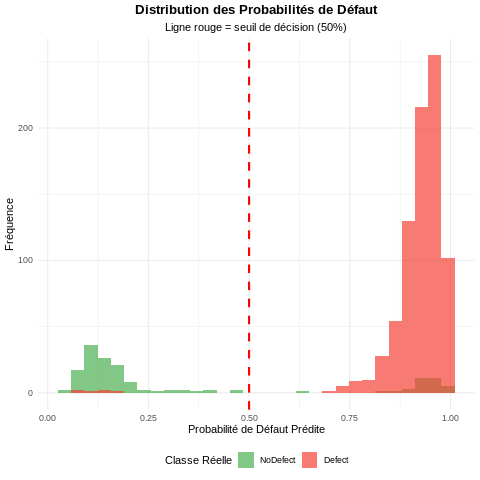

In [ ]:
%%R

cat("\n", rep("=", 70), "\n")
cat("🔮 EXEMPLE DE PRÉDICTION ET VISUALISATION\n")
cat(rep("=", 70), "\n\n")

library(ggplot2)

# Prendre quelques exemples de l'ensemble de test
nouveaux_produits <- test_data[1:5, ]

cat("Nouveaux produits à classifier:\n")
print(head(nouveaux_produits, 5))

# Prédiction avec le meilleur modèle (Random Forest)
predictions <- predict(model_rf, nouveaux_produits)
probabilities <- predict(model_rf, nouveaux_produits, type = "prob")

cat("\n=== RÉSULTATS DES PRÉDICTIONS ===\n\n")
resultats <- data.frame(
  Produit = 1:5,
  Valeur_Reelle = nouveaux_produits[[target_var]],
  Prediction = predictions,
  Prob_Non_Defaut = round(probabilities[, 1], 3),
  Prob_Defaut = round(probabilities[, 2], 3)
)

print(resultats)

# Vérifier la précision sur ces exemples
correct <- sum(predictions == nouveaux_produits[[target_var]])
cat("\nPrédictions correctes:", correct, "/", nrow(nouveaux_produits), "\n\n")

# ============================================================================
# VISUALISATION 1 : Probabilités de prédiction
# ============================================================================
cat("📊 Génération des visualisations...\n\n")

# Préparer les données pour le graphique
prob_data <- data.frame(
  Produit = factor(1:5),
  Prob_Defaut = probabilities[, "Defect"],
  Valeur_Reelle = nouveaux_produits[[target_var]],
  Prediction = predictions
)

# Graphique des probabilités
p1 <- ggplot(prob_data, aes(x = Produit, y = Prob_Defaut, fill = Valeur_Reelle)) +
  geom_bar(stat = "identity", alpha = 0.7) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  geom_text(aes(label = paste0(round(Prob_Defaut * 100, 1), "%")),
            vjust = -0.5, size = 4) +
  scale_fill_manual(values = c("NoDefect" = "#4CAF50", "Defect" = "#F44336")) +
  labs(title = "Probabilité de Défaut - 5 Nouveaux Produits",
       subtitle = "Ligne rouge = seuil de décision (50%)",
       x = "Produit",
       y = "Probabilité de Défaut",
       fill = "Valeur Réelle") +
  theme_minimal() +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

print(p1)

# ============================================================================
# VISUALISATION 2 : Séparation dans l'espace 2D (MaintenanceHours vs DefectRate)
# ============================================================================

# Créer un grid de prédictions pour visualiser la frontière de décision
x_seq <- seq(min(test_data$MaintenanceHours, na.rm = TRUE),
             max(test_data$MaintenanceHours, na.rm = TRUE),
             length.out = 100)
y_seq <- seq(min(test_data$DefectRate, na.rm = TRUE),
             max(test_data$DefectRate, na.rm = TRUE),
             length.out = 100)

grid <- expand.grid(MaintenanceHours = x_seq, DefectRate = y_seq)

# Ajouter les valeurs moyennes pour les autres variables
for(var in setdiff(names(test_data), c(target_var, "MaintenanceHours", "DefectRate"))) {
  if(is.numeric(test_data[[var]])) {
    grid[[var]] <- mean(test_data[[var]], na.rm = TRUE)
  }
}

# Prédire sur le grid
grid$Prediction <- predict(model_rf, grid, type = "prob")[, "Defect"]

# Graphique de séparation
p2 <- ggplot() +
  # Contour de la frontière de décision
  geom_contour_filled(data = grid,
                      aes(x = MaintenanceHours, y = DefectRate, z = Prediction),
                      alpha = 0.3) +
  # Points de test
  geom_point(data = test_data,
             aes(x = MaintenanceHours, y = DefectRate,
                 color = .data[[target_var]], shape = .data[[target_var]]),
             size = 2, alpha = 0.6) +
  # Points de prédiction (les 5 nouveaux)
  geom_point(data = nouveaux_produits,
             aes(x = MaintenanceHours, y = DefectRate),
             size = 6, shape = 21, fill = "yellow", color = "black", stroke = 2) +
  geom_text(data = nouveaux_produits,
            aes(x = MaintenanceHours, y = DefectRate, label = 1:5),
            vjust = -1.5, size = 5, fontface = "bold") +
  scale_color_manual(values = c("NoDefect" = "#4CAF50", "Defect" = "#F44336")) +
  scale_shape_manual(values = c("NoDefect" = 16, "Defect" = 17)) +
  labs(title = "Séparation des Données : MaintenanceHours vs DefectRate",
       subtitle = "Points jaunes = 5 nouveaux produits à prédire",
       x = "Heures de Maintenance",
       y = "Taux de Défauts",
       color = "Classe Réelle",
       shape = "Classe Réelle") +
  theme_minimal() +
  theme(legend.position = "right",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

print(p2)

# ============================================================================
# VISUALISATION 3 : Comparaison Réalité vs Prédiction
# ============================================================================

# Créer un dataset pour tous les produits de test
all_predictions <- predict(model_rf, test_data)
all_probs <- predict(model_rf, test_data, type = "prob")

comparison_data <- data.frame(
  MaintenanceHours = test_data$MaintenanceHours,
  DefectRate = test_data$DefectRate,
  QualityScore = test_data$QualityScore,
  Valeur_Reelle = test_data[[target_var]],
  Prediction = all_predictions,
  Prob_Defaut = all_probs[, "Defect"],
  Correct = all_predictions == test_data[[target_var]]
)

p3 <- ggplot(comparison_data,
             aes(x = MaintenanceHours, y = DefectRate)) +
  geom_point(aes(color = Correct, shape = Valeur_Reelle),
             size = 3, alpha = 0.6) +
  scale_color_manual(values = c("TRUE" = "#4CAF50", "FALSE" = "#F44336"),
                     labels = c("TRUE" = "Correct", "FALSE" = "Erreur")) +
  scale_shape_manual(values = c("NoDefect" = 16, "Defect" = 17)) +
  labs(title = "Qualité des Prédictions sur l'Ensemble de Test",
       subtitle = "Vert = Prédiction correcte, Rouge = Erreur",
       x = "Heures de Maintenance",
       y = "Taux de Défauts",
       color = "Prédiction",
       shape = "Classe Réelle") +
  theme_minimal() +
  theme(legend.position = "right",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

print(p3)

# ============================================================================
# VISUALISATION 4 : Distribution des probabilités
# ============================================================================

p4 <- ggplot(comparison_data, aes(x = Prob_Defaut, fill = Valeur_Reelle)) +
  geom_histogram(bins = 30, alpha = 0.7, position = "identity") +
  geom_vline(xintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  scale_fill_manual(values = c("NoDefect" = "#4CAF50", "Defect" = "#F44336")) +
  labs(title = "Distribution des Probabilités de Défaut",
       subtitle = "Ligne rouge = seuil de décision (50%)",
       x = "Probabilité de Défaut Prédite",
       y = "Fréquence",
       fill = "Classe Réelle") +
  theme_minimal() +
  theme(legend.position = "bottom",
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5))

print(p4)

cat("\n✅ Visualisations générées avec succès!\n")

## 📌 ÉTAPE 18 : Sauvegarde des Résultats

In [ ]:
%%R

cat("💾 Sauvegarde des résultats...\n\n")

# Sauvegarder le tableau de comparaison
write.csv(results_comparison, "comparaison_modeles.csv", row.names = FALSE)
cat("✅ Fichier sauvegardé: comparaison_modeles.csv\n")

# Sauvegarder les modèles
saveRDS(model_logistic, "model_logistic.rds")
saveRDS(model_lda, "model_lda.rds")
saveRDS(model_knn, "model_knn.rds")
saveRDS(model_svm, "model_svm.rds")
saveRDS(model_rf, "model_rf.rds")

cat("✅ Tous les modèles sauvegardés (.rds)\n")

cat("\n🎉 ANALYSE TERMINÉE AVEC SUCCÈS!\n")

💾 Sauvegarde des résultats...

✅ Fichier sauvegardé: comparaison_modeles.csv
✅ Tous les modèles sauvegardés (.rds)

🎉 ANALYSE TERMINÉE AVEC SUCCÈS!


## 📌 ÉTAPE 19 : Téléchargement des Résultats

Pour télécharger les fichiers générés depuis Google Colab :

In [ ]:
from google.colab import files
import os

# Lister les fichiers disponibles
print("📂 Fichiers disponibles pour téléchargement:\n")
fichiers = [f for f in os.listdir('.') if f.endswith(('.csv', '.rds'))]
for f in fichiers:
    print(f"  - {f}")

# Télécharger le tableau de comparaison
if os.path.exists('comparaison_modeles.csv'):
    print("\n⬇️ Téléchargement de comparaison_modeles.csv...")
    files.download('comparaison_modeles.csv')



📂 Fichiers disponibles pour téléchargement:

  - model_knn.rds
  - model_rf.rds
  - model_lda.rds
  - comparaison_modeles.csv
  - model_logistic.rds
  - model_svm.rds
  - manufacturing_defects_dataset.csv

⬇️ Téléchargement de comparaison_modeles.csv...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>